In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
indicators = pd.read_csv('/content/drive/MyDrive/DM/Clustering/customer_indicators_dbscan.csv',index_col=0)
indicators.drop(columns = ["cluster"], inplace=True)

In [6]:
indicators.describe()

,TotalProducts,distance_in_time_purchase,Qta_entropy,Qta_mean,Sale_entropy,Sale_mean
count,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000,3946.000000
mean,0.092378,0.515596,0.260383,0.183406,0.282317,0.167236
std,0.115191,0.411099,0.319440,0.136662,0.336345,0.131103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.020743,0.128205,0.000000,0.085845,0.000000,0.071157
50%,0.050421,0.326923,0.000000,0.150639,0.000000,0.135807
75%,0.116656,1.000000,0.579380,0.248717,0.612602,0.233337
max,0.986239,1.000000,1.000000,1.000000,1.000000,1.000000


##Choice of the number of clusters

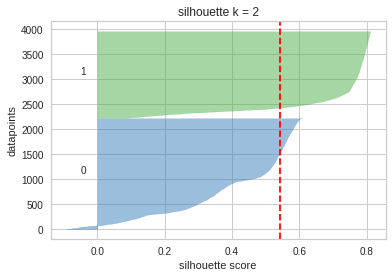

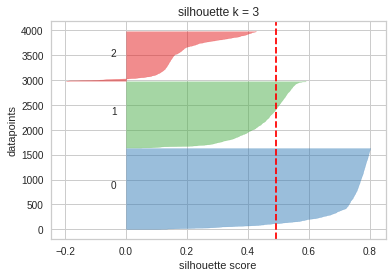

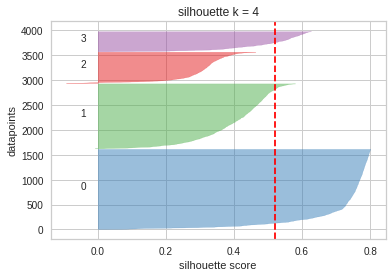

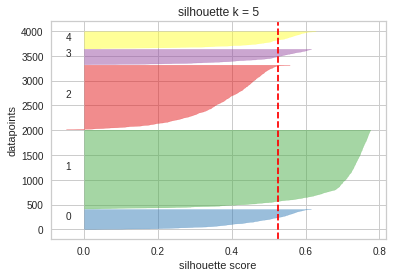

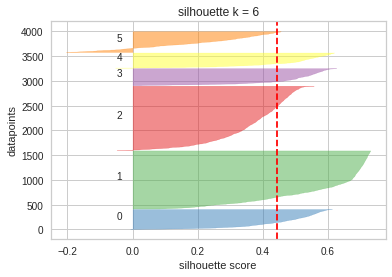

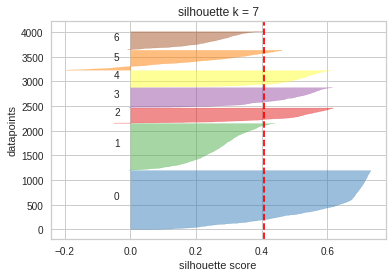

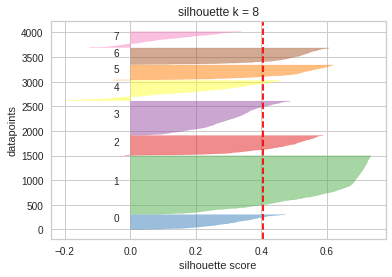

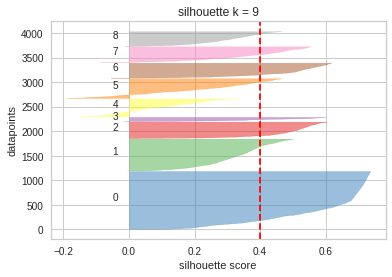

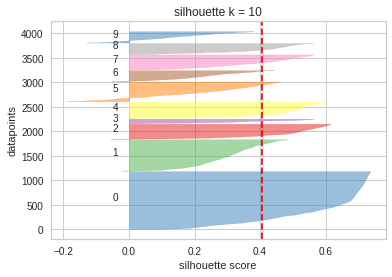

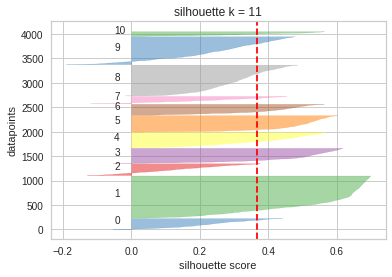

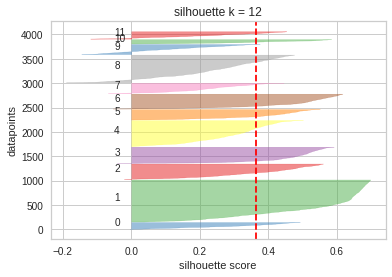

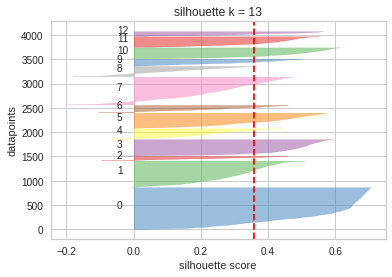

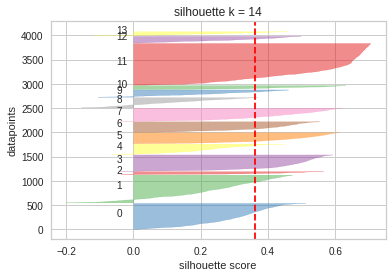

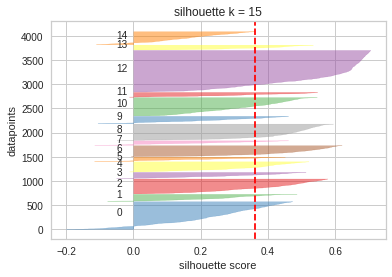

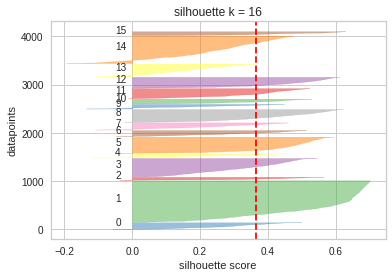

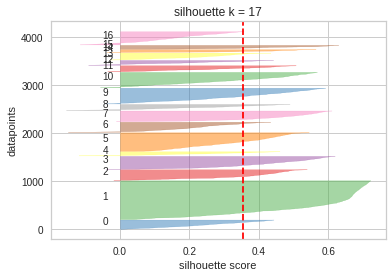

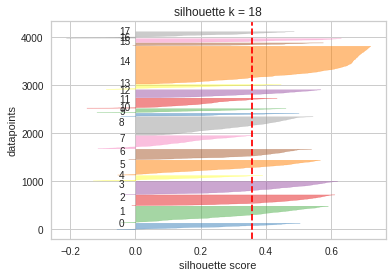

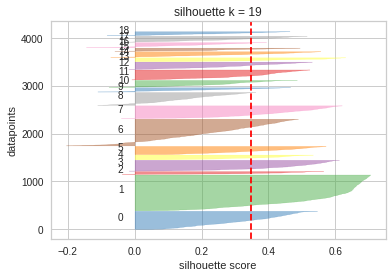

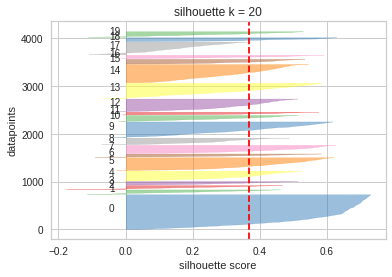

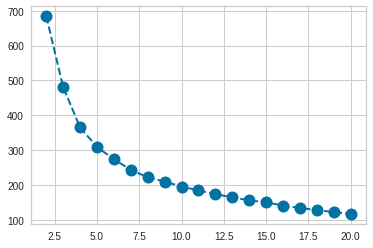

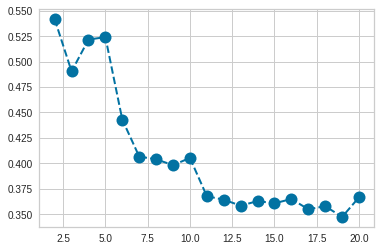

In [ ]:
MAX_K_VALUE = 20
silhouette_scores = []
sse = []

for i in range(2, MAX_K_VALUE + 1):
    fig = plt.figure()
    km = KMeans(n_clusters=i, n_init=20, max_iter=200)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(indicators)
    sse.append(km.inertia_)
    silhouette_avg = silhouette_score(indicators, km.labels_)
    silhouette_scores.append(silhouette_avg)
    plt.title('silhouette k = ' + str(i))
    visualizer.ax.set_xlabel("silhouette score")
    visualizer.ax.set_ylabel("datapoints")
    #plt.show()

plt.show()
plt.plot([el for el in range(2, MAX_K_VALUE + 1)], sse, 'o--', linewidth=2, markersize=12)
plt.savefig('./sse.png')
#plt.savefig('/content/drive/MyDrive/DM/Clustering/K-means/sse.png')
plt.show()
plt.plot([el for el in range(2, MAX_K_VALUE + 1)], silhouette_scores, 'o--', linewidth=2, markersize=12)
plt.savefig('./silhouette_scores.png')
#plt.savefig('/content/drive/My Drive/DM/Clustering/K-means/silhouette_scores.png')
plt.show()

##Clustering and statistics

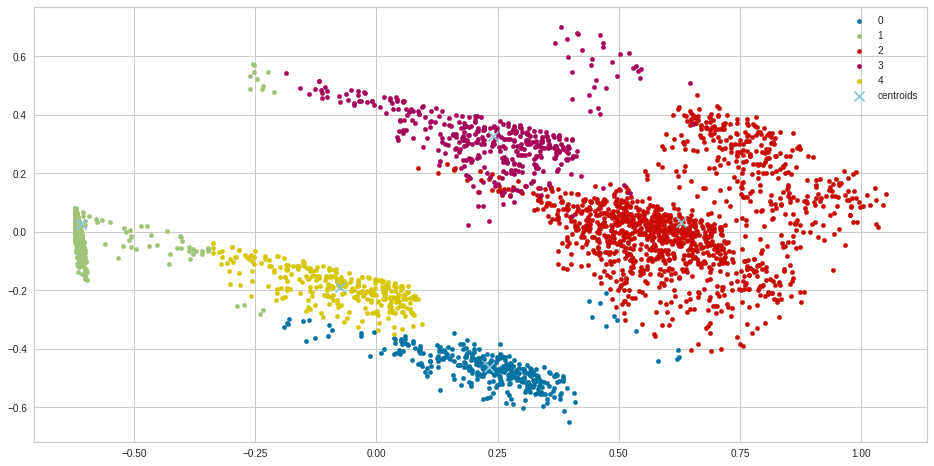

In [7]:
from sklearn.decomposition import PCA
import numpy as np
num_clusters = 5
data = indicators.copy()

km = KMeans(n_clusters=num_clusters,n_init=50)
label = km.fit_predict(data)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)
pca_centroids = pca.transform(km.cluster_centers_)
data['cluster'] = label

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot()
for cluster in range (0,num_clusters):
  tmp = data[data['cluster'] == cluster]
  del tmp['cluster']
  points = pca.transform(tmp)
  ax.scatter(points[:, 0], points[:, 1], cmap=plt.cm.Set2, s=20,label=str(cluster))
ax.scatter(pca_centroids[:,0],pca_centroids[:,1],marker = 'x',s=100,label='centroids')
ax.legend(loc='best')
plt.savefig('./PCA_2d.png')
#plt.savefig('/content/drive/MyDrive/DM/Clustering/K-means/PCA_2d.png')
plt.show()

In [9]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
label = km.fit_predict(indicators)
X_pca = PCA(n_components=3).fit_transform(indicators)

x = X_pca[:,0]
y = X_pca[:,1]
z = X_pca[:,2]

fig = px.scatter_3d(X_pca, x=x, y=y, z=z,color=label)
fig.update_traces(marker=dict(size=4))

fig.show()

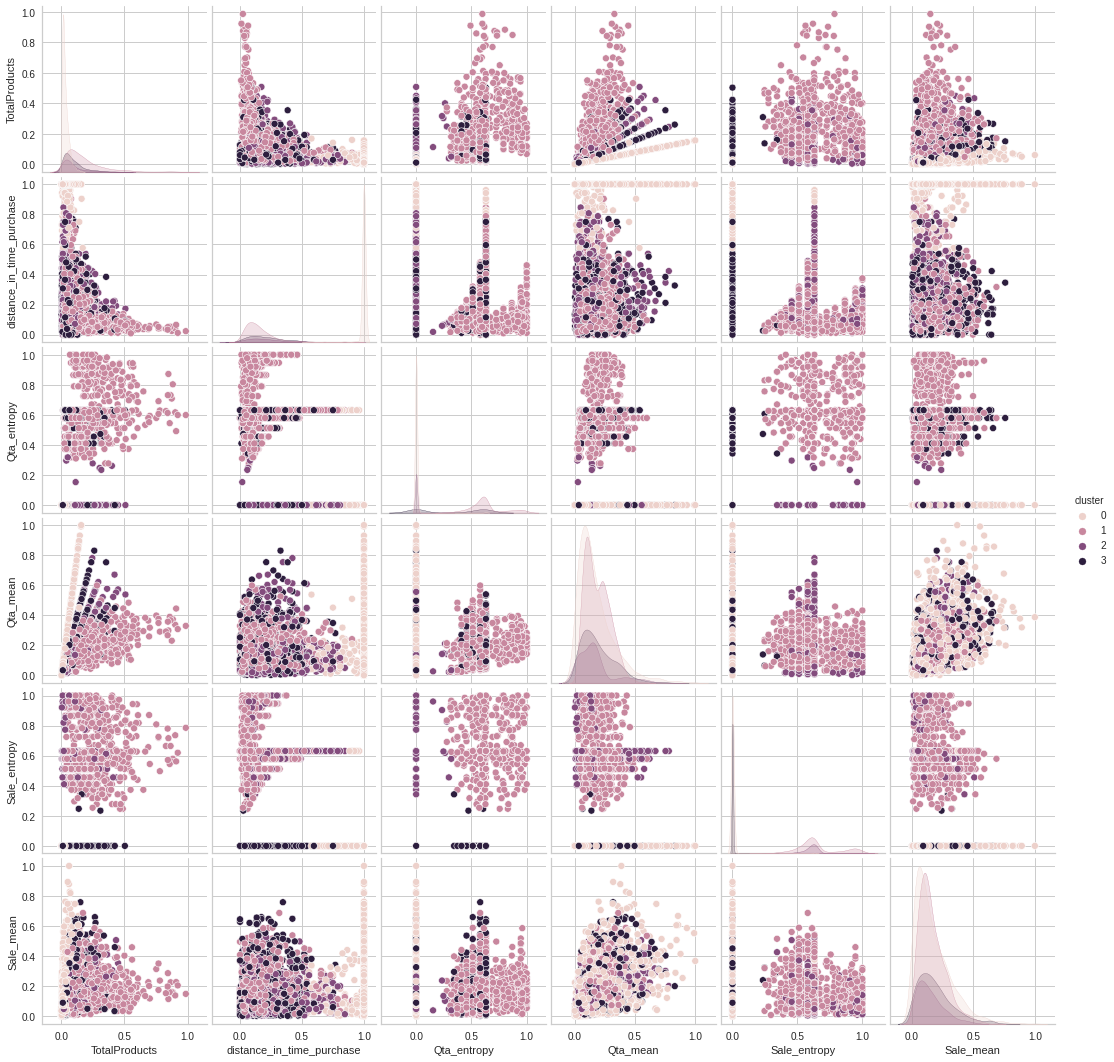

In [ ]:
sns.pairplot(data, hue="cluster")

##Clustering analysis

In [ ]:
cluster_0 = data[data['cluster'] == 0]
cluster_1 = data[data['cluster'] == 1]
cluster_2 = data[data['cluster'] == 2]
cluster_3 = data[data['cluster'] == 3]
cluster_4 = data[data['cluster'] == 4]

In [ ]:
cluster_0.describe()

,TotalProducts,distance_in_time_purchase,Qta_entropy,Qta_mean,Sale_entropy,Sale_mean,cluster
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.0
mean,0.029013,0.988927,0.003135,0.177968,0.003919,0.168744,0.0
std,0.025373,0.058774,0.044378,0.155547,0.049585,0.147818,0.0
min,0.000000,0.538462,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.011091,1.000000,0.000000,0.068152,0.000000,0.058923,0.0
50%,0.021257,1.000000,0.000000,0.133028,0.000000,0.126500,0.0
75%,0.040049,1.000000,0.000000,0.238532,0.000000,0.242578,0.0
max,0.168823,1.000000,0.630930,1.000000,0.630930,1.000000,0.0


In [ ]:
cluster_1.describe()

,TotalProducts,distance_in_time_purchase,Qta_entropy,Qta_mean,Sale_entropy,Sale_mean,cluster
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.0
mean,0.173344,0.161427,0.631024,0.188226,0.654412,0.163160,1.0
std,0.149749,0.130612,0.149563,0.099963,0.165083,0.106857,0.0
min,0.013966,0.000000,0.277292,0.021719,0.246847,0.008525,1.0
25%,0.068495,0.074176,0.548858,0.104147,0.579380,0.084222,1.0
50%,0.131649,0.129808,0.612602,0.170953,0.630930,0.138728,1.0
75%,0.225816,0.211538,0.630930,0.258109,0.729847,0.220676,1.0
max,0.986239,0.903846,1.000000,0.598515,1.000000,0.687222,1.0


In [ ]:
cluster_2.describe()

,TotalProducts,distance_in_time_purchase,Qta_entropy,Qta_mean,Sale_entropy,Sale_mean,cluster
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.0
mean,0.086455,0.244283,0.004431,0.171237,0.624245,0.144990,2.0
std,0.088393,0.184877,0.033999,0.150967,0.102454,0.106665,0.0
min,0.003081,0.000000,0.000000,0.003058,0.342951,0.004811,2.0
25%,0.023311,0.101763,0.000000,0.051442,0.579380,0.060664,2.0
50%,0.057301,0.192308,0.000000,0.141219,0.630930,0.121243,2.0
75%,0.108441,0.326923,0.000000,0.193644,0.630930,0.204062,2.0
max,0.507496,0.846154,0.317521,0.781127,1.000000,0.525699,2.0


In [ ]:
cluster_3.describe()

,TotalProducts,distance_in_time_purchase,Qta_entropy,Qta_mean,Sale_entropy,Sale_mean,cluster
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.0
mean,0.090109,0.212358,0.312922,0.195163,0.001316,0.186187,3.0
std,0.078312,0.145641,0.297958,0.140358,0.019280,0.142630,0.0
min,0.000616,0.000000,0.000000,0.001311,0.000000,0.000733,3.0
25%,0.032861,0.096154,0.000000,0.086664,0.000000,0.079086,3.0
50%,0.067878,0.177404,0.455486,0.162598,0.000000,0.155279,3.0
75%,0.122458,0.298077,0.630930,0.276376,0.000000,0.252842,3.0
max,0.502978,0.769231,0.630930,0.830275,0.342951,0.758637,3.0


In [ ]:
cluster_4.describe()

,TotalProducts,distance_in_time_purchase,Qta_entropy,Qta_mean,Sale_entropy,Sale_mean,cluster
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


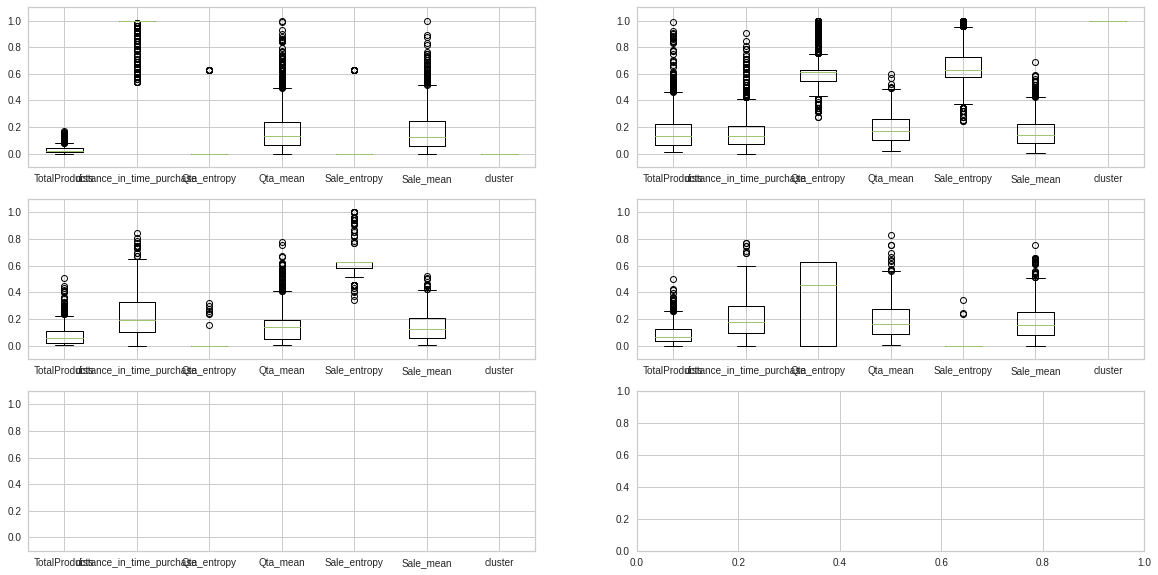

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(20, 10))
label_names = cluster_0.columns
ax[0][0].boxplot(cluster_0.to_numpy())
ax[0][0].set_ylim(-0.1,1.1)
ax[0][0].set_xticklabels(label_names)
ax[0][1].boxplot(cluster_1.to_numpy())
ax[0][1].set_ylim(-0.1,1.1)
ax[0][1].set_xticklabels(label_names)
ax[1][0].boxplot(cluster_2.to_numpy())
ax[1][0].set_ylim(-0.1,1.1)
ax[1][0].set_xticklabels(label_names)
ax[1][1].boxplot(cluster_3.to_numpy())
ax[1][1].set_ylim(-0.1,1.1)
ax[1][1].set_xticklabels(label_names)

ax[2][0].boxplot(cluster_4.to_numpy())
ax[2][0].set_ylim(-0.1,1.1)
ax[2][0].set_xticklabels(label_names)

plt.savefig('./box-plots-5.png')
#plt.savefig('/content/drive/MyDrive/DM/Clustering/K-means/box-plots-5.png')
print()

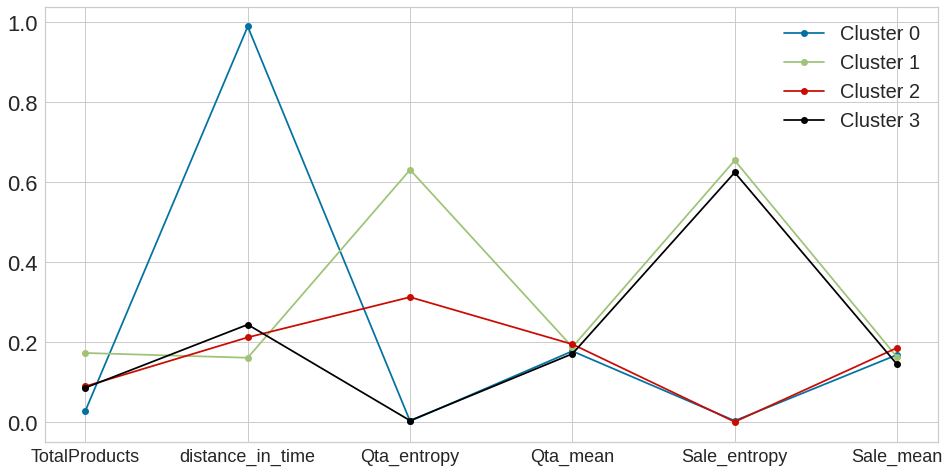

In [ ]:
label = km.predict(indicators)
plt.figure(figsize=(16, 8))
centers = km.cluster_centers_
columns = data.columns
columns = columns.to_list()
columns.remove('cluster')
columns[columns.index('distance_in_time_purchase')] = 'distance_in_time'
colour = ['b','g','r','black','grey']
for i in range(0,num_clusters):
  plt.plot(centers[i],c = colour[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', labelsize=22)
plt.xticks(range(0, len(columns)), columns, fontsize=18)
plt.legend(fontsize=20)
data['cluster'] = label

plt.savefig('./parallel-plots-5.pdf')
#plt.savefig('/content/drive/My Drive/DM/Clustering/K-means/parallel-plots-5.pdf')
plt.show()